# 6.6 WHR Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 01 Importing your libraries and data
#### 02 Subsetting, wrangling, and cleaning time-series data
#### 03 Time series analysis: decomposition
#### 04 Testing for stationarity
#### 05 Stationarizing the Federal Reserve Economic Data
#### 06 BONUS: ARIMA Model

### 01 Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
#create data path
path = r'C:\Users\fa_an\OneDrive\CareerFoundry\Tasks\Data Analytics Immersion\Tasks 6.1-6.7'

In [3]:
#data = WHR
data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WHR_all.pkl'))

In [4]:
data.head(5)

,Country,Year,Region,Happiness Rank,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Dystopia + Residual
0,Afghanistan,2023,Southern Asia,137,1.859,0.645,0.000,0.087,0.000,0.093,0.059,0.975
1,Afghanistan,2017,Southern Asia,141,3.794,0.401,0.582,0.181,0.106,0.312,0.061,2.151
2,Afghanistan,2018,Southern Asia,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036,2.196
3,Afghanistan,2022,Southern Asia,146,2.404,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,Afghanistan,2021,Southern Asia,149,2.523,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [5]:
data.shape

(1505, 12)

In [6]:
data.columns

Index(['Country', 'Year', 'Region', 'Happiness Rank', 'Happiness Score', 'GDP',
       'Social Support', 'Life Expectancy', 'Freedom', 'Generosity',
       'Corruption', 'Dystopia + Residual'],
      dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

In [15]:
data_2 = data[data['Country'] == 'Denmark'][['Year', 'Happiness Score']].set_index('Year')

data_2 = data_2.sort_index()

In [16]:
data_2.head()

,Happiness Score
Year,
2015,7.527
2016,7.526
2017,7.522
2018,7.555
2019,7.600


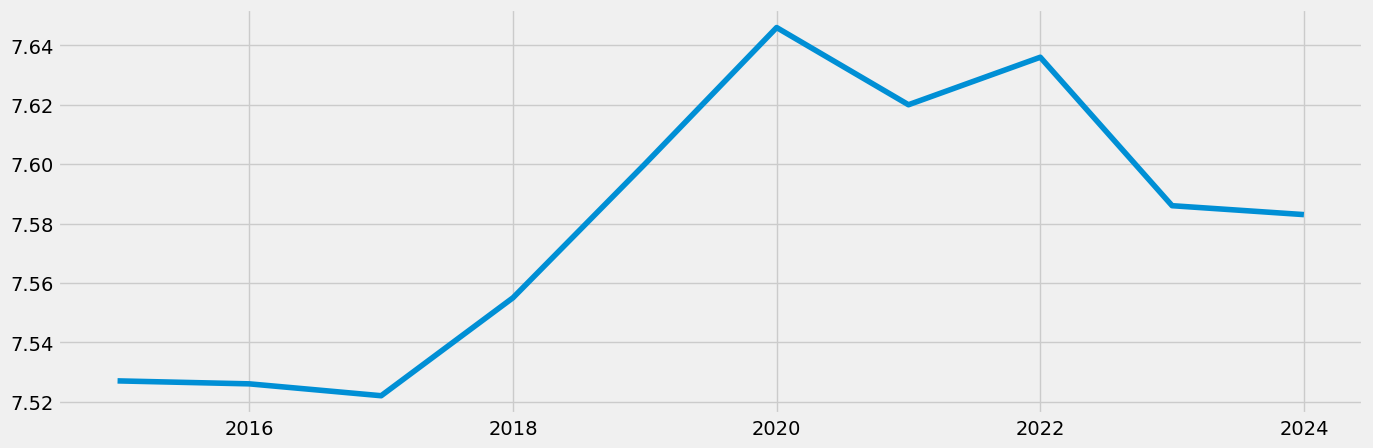

In [17]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_2)

### 02 Subsetting, wrangling, and cleaning time-series data

In [18]:
# Reset index so that you can use the "Year" column as a filter

data_2 = data.reset_index()

In [19]:
data_2.head()

,index,Country,Year,Region,Happiness Rank,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Dystopia + Residual
0,0,Afghanistan,2023,Southern Asia,137,1.859,0.645,0.000,0.087,0.000,0.093,0.059,0.975
1,1,Afghanistan,2017,Southern Asia,141,3.794,0.401,0.582,0.181,0.106,0.312,0.061,2.151
2,2,Afghanistan,2018,Southern Asia,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036,2.196
3,3,Afghanistan,2022,Southern Asia,146,2.404,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,4,Afghanistan,2021,Southern Asia,149,2.523,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [20]:
# Filter the DataFrame to include data for Denmark only, along with 'Year' and 'Happiness Score'
data_sub = data_2[data_2['Country'] == 'Denmark'][['Year', 'Happiness Score']]

In [21]:
data_sub.shape

(10, 2)

In [24]:
data_sub.head(11)

,Year,Happiness Score
315,2016-01-01,7.526
316,2017-01-01,7.522
317,2019-01-01,7.600
318,2020-01-01,7.646
319,2021-01-01,7.620
320,2022-01-01,7.636
321,2023-01-01,7.586
322,2015-01-01,7.527
323,2018-01-01,7.555
1363,2024-01-01,7.583


In [25]:
# Assuming 'data_sub' is your DataFrame with 'Year' column
data_sub['Year'] = pd.to_datetime(data_sub['Year'], format='%Y')

print(data_sub.head(10))


           Year  Happiness Score
315  2016-01-01            7.526
316  2017-01-01            7.522
317  2019-01-01            7.600
318  2020-01-01            7.646
319  2021-01-01            7.620
320  2022-01-01            7.636
321  2023-01-01            7.586
322  2015-01-01            7.527
323  2018-01-01            7.555
1363 2024-01-01            7.583


In [29]:
# Assuming 'data_sub' is your DataFrame with 'Year' as the index and 'Country', 'Happiness Score' as columns

# Convert 'Year' to datetime if it's not already in datetime format
data_sub.index = pd.to_datetime(data_sub.index)

# Sort the index in ascending order
data_sub.sort_index(inplace=True)

# Display the DataFrame to verify the changes
print(data_sub)


            Happiness Score
datetime                   
2015-01-01            7.527
2016-01-01            7.526
2017-01-01            7.522
2018-01-01            7.555
2019-01-01            7.600
2020-01-01            7.646
2021-01-01            7.620
2022-01-01            7.636
2023-01-01            7.586
2024-01-01            7.583


## Explain what logic you were following when selecting your data points.

Since this is a univariate time analysis, one can only use values or the Happiness Score from one country. I chose Denmark. That way I could see what the time analysis would predict for future values at the end. I tried with not listing the countries, which wouldn't make sense, but wanted to see how the values would be plotted. But, that looked a little weird. I also converted the Year to a date of YYYY-MM-DD.


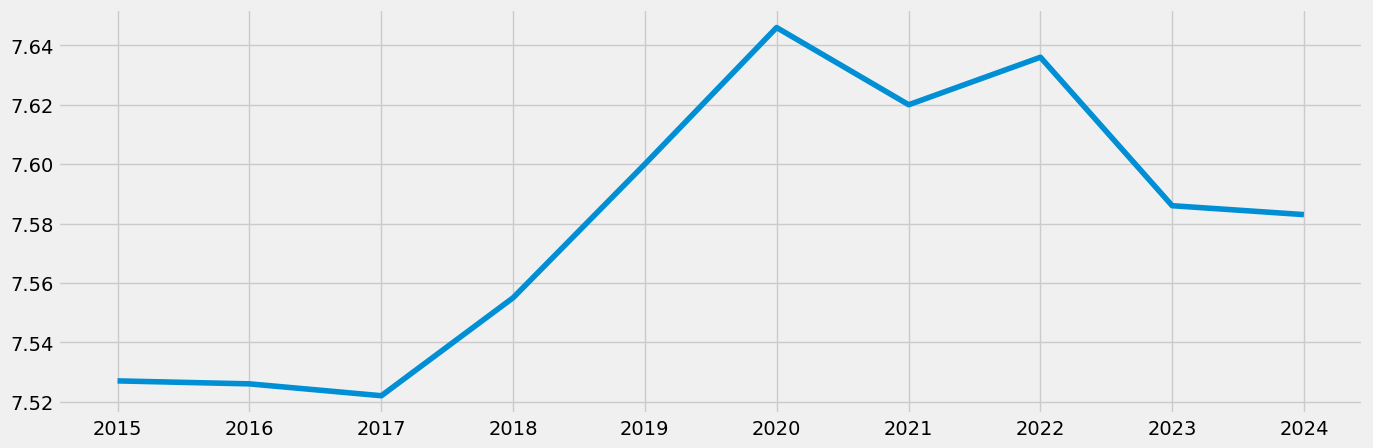

In [30]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [31]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum()

Happiness Score    0
dtype: int64

In [32]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

### 03 Time-series analysis: decomposition

In [39]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [40]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

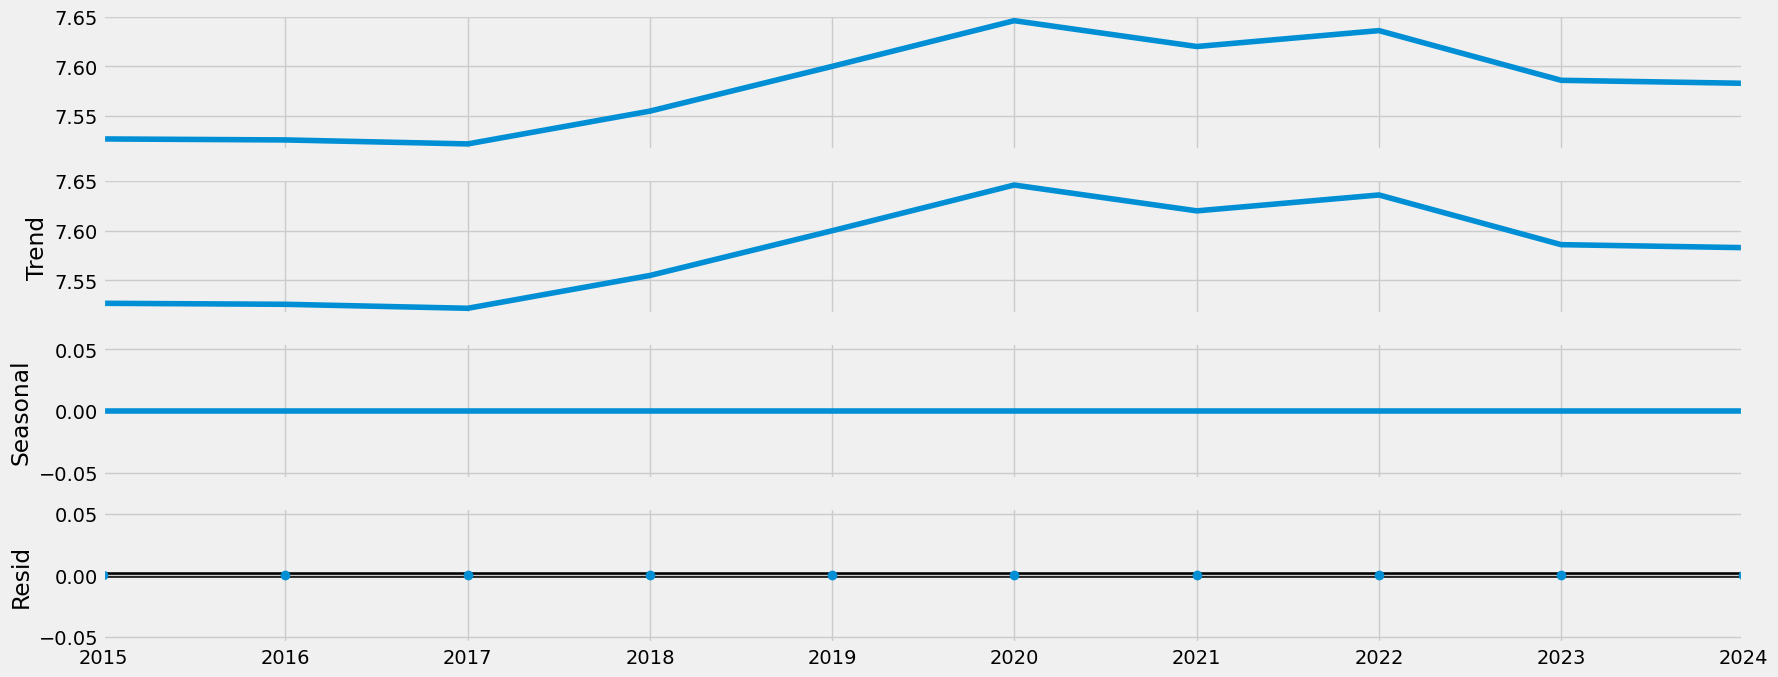

In [41]:
# Plot the separate components

decomposition.plot()
plt.show()

## Analyze the results from the plot.

The top line represents the original data, second line represents the trend, next seasonal, and lastly residual. The Seasonal and Resid show straight lines, which indicates that there is no seasonality and the data appears to be random. However, in the Trend section exhibits the same pattern as the original data, meaning that there is also no Trend. Which makes sense since this is only annual data, unlike sales data that may have many points in time during a week, month, quarter, or year.

### 04 Testing for stationarity

In [42]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Happiness Score'])

Dickey-Fuller Stationarity test:
Test Statistic                -3.260980
p-value                        0.016715
Number of Lags Used            2.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


## Interpret the results and reference your null hypothesis

The null hypothesis of this test is that the time series is non-stationary. The test aims to reject the null hypothesis. However, based on the results, the Test Stat of -3.260980 is not less than the Crit Value of 5 or 10%. Which means I CANNOT reject the null hypothesis, meaning that the data is still STATIONARY. Although the p-value is smaller than the significance levels of 5 and 10%, just not less than 1%, which further supports the test failing. Onto making the data stationary. See 2nd test in Section 05.

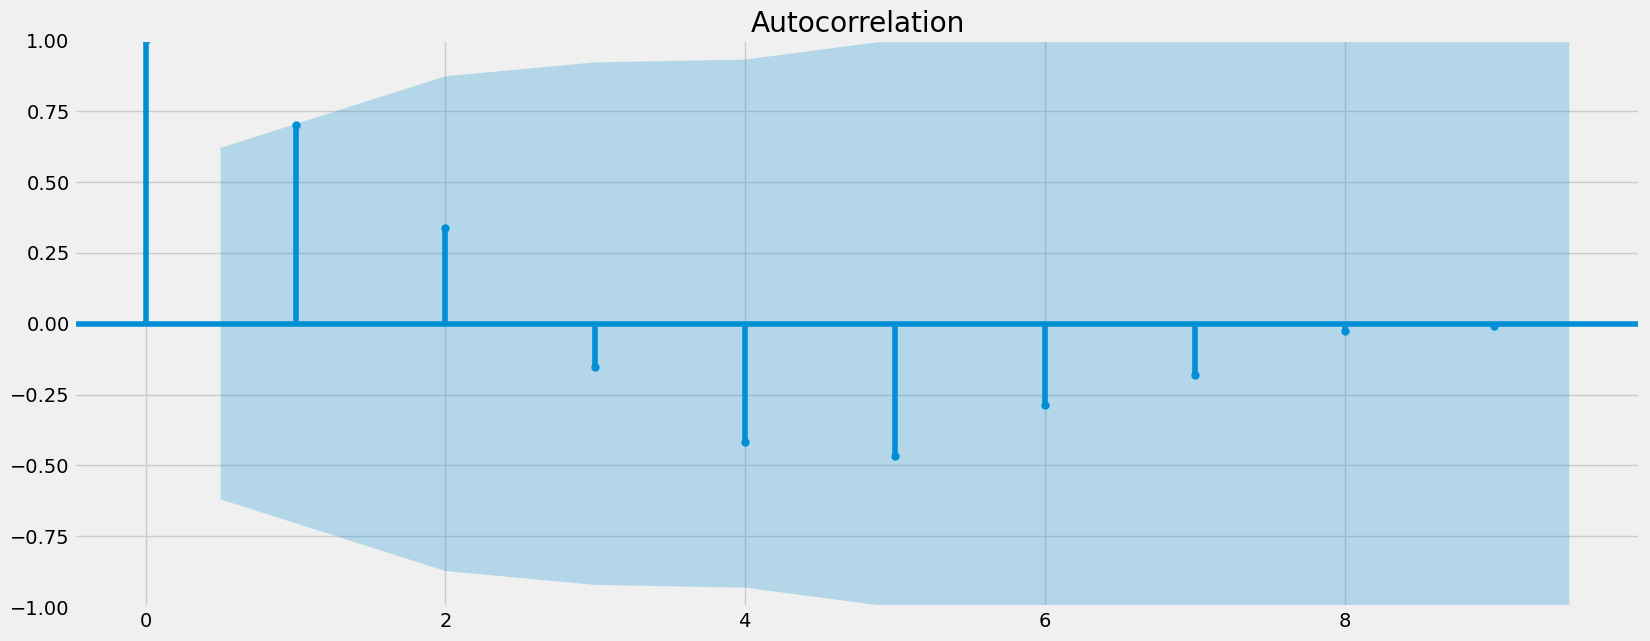

In [43]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### 05 Stationarizing the WHR data

In [44]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [45]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [46]:
data_diff.head()

,Happiness Score
datetime,
2016-01-01,-0.001
2017-01-01,-0.004
2018-01-01,0.033
2019-01-01,0.045
2020-01-01,0.046


In [47]:
data_diff.columns

Index(['Happiness Score'], dtype='object')

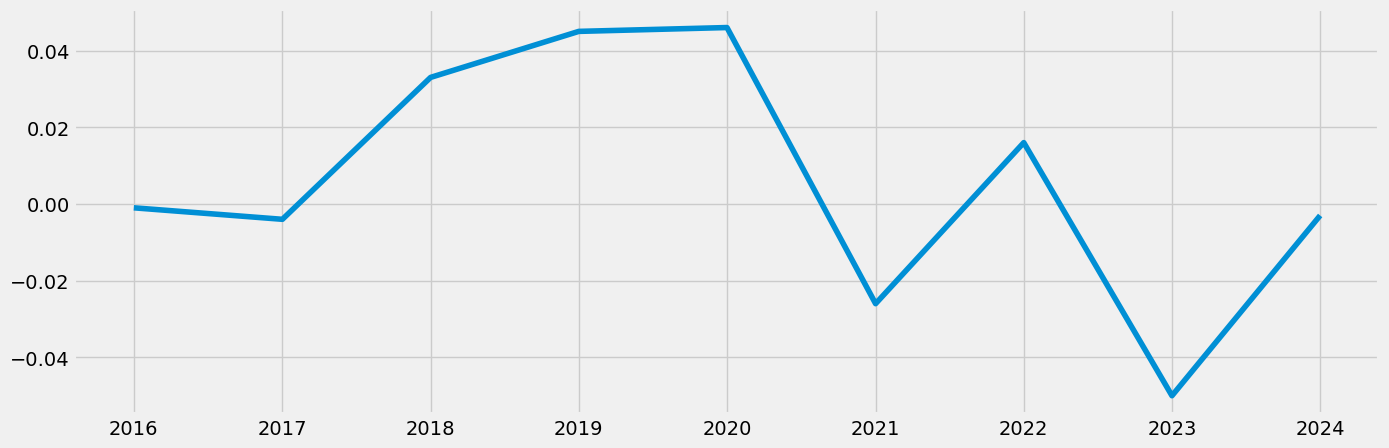

In [48]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [49]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -2.232341
p-value                        0.194718
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


## ## Interpret the results after stationarizing the WHR data.

This time around the test is worse, NOT allowing me to reject the Null hypothesis. The Test Statistic is -2.232341 which is more than the Crit Value of 5 and 10%. The p-value is also more than the significance levels of 5 and 10%. This all means that the data is still NON-STATIONARY. Boo!

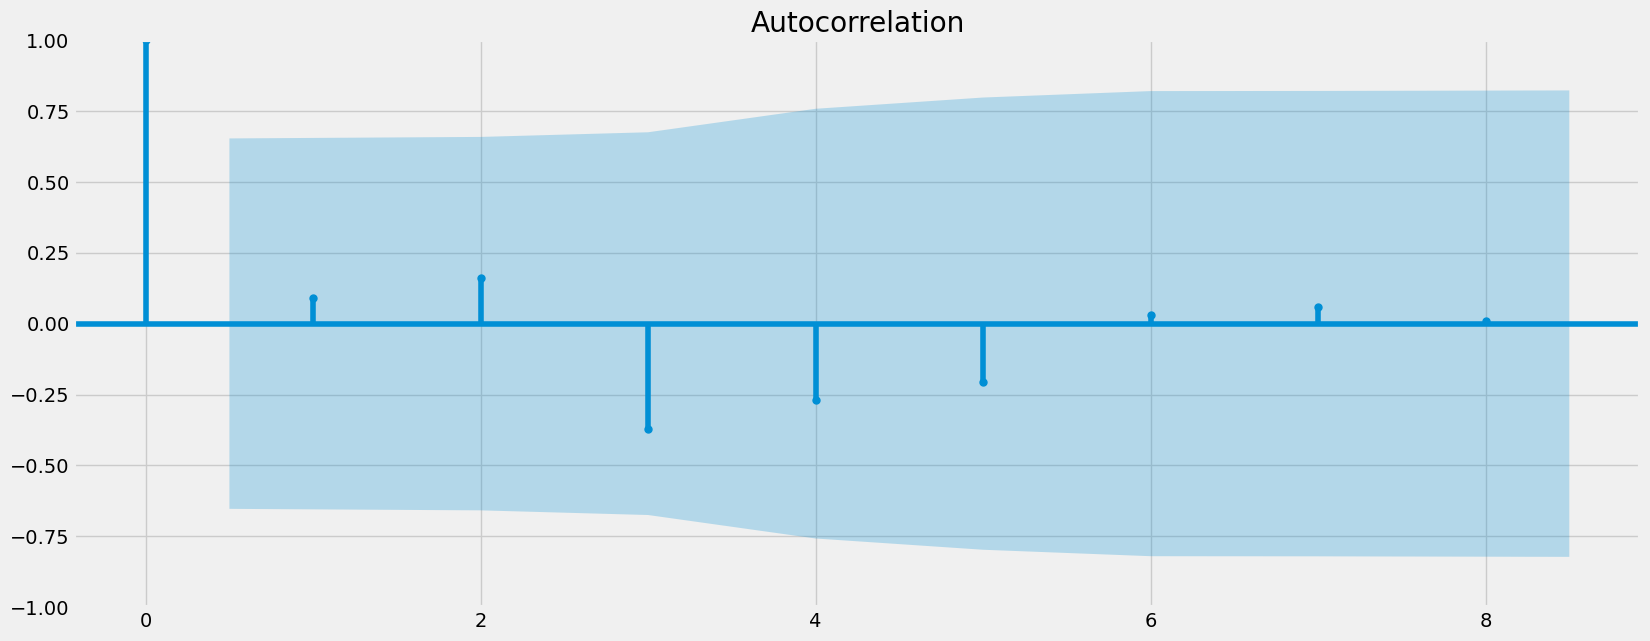

In [50]:
plot_acf(data_diff)
plt.show()

## Will conduct another set on OECD Data, see Notebook 2!